# Interactive Mapping 

In [1]:
# Load packages 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns         
import numpy as np
import os
import folium
import plotly.express as px
import rasterio 
import rioxarray as rioxr
# from bokeh.plotting import figure, show

# import libpysal as lps 
# from libpysal.weights import W 
# from esda.getisord import G_Local
# from functions import state_gstar

# Remove max columns
pd.set_option('display.max_columns', None)

In [2]:
# Read in GeoJSON of all 
national_results = gpd.read_file('/capstone/justice40/data/national_results.geojson')
national_results.head()

,tract_id,total_criteria,total_burdens,dac_wo_neighbors,dac_relaxed_low_income,dac,percent_area_dac,share_of_dac_neighbors,total_population,original_g_star,standardized_g_star,p_norm,standardized_g_star_crit,p_norm_crit,geometry
0,1001020100,0,0.0,False,False,False,0,0.0,1993.0,0.0,-0.620617,0.267426,-0.560448,0.287587,"POLYGON ((-86.48196 32.49876, -86.48189 32.498..."
1,1001020200,0,0.0,False,False,False,0,0.0,1959.0,0.0,-0.620617,0.267426,-0.560448,0.287587,"POLYGON ((-86.46828 32.4737, -86.468 32.47371,..."
2,1001020300,0,0.0,False,False,False,0,0.0,3507.0,0.0,-0.620617,0.267426,-0.560448,0.287587,"POLYGON ((-86.46538 32.47372, -86.46597 32.473..."
3,1001020400,0,0.0,False,False,False,0,0.0,3878.0,0.0,-0.620617,0.267426,-0.560448,0.287587,"POLYGON ((-86.43807 32.45349, -86.43812 32.453..."
4,1001020500,0,0.0,False,False,False,0,0.0,10596.0,0.0,-0.620617,0.267426,-0.560448,0.287587,"POLYGON ((-86.4118 32.47416, -86.4118 32.47369..."


Text(0.5, 1.0, 'Histogram of Total Burdens')

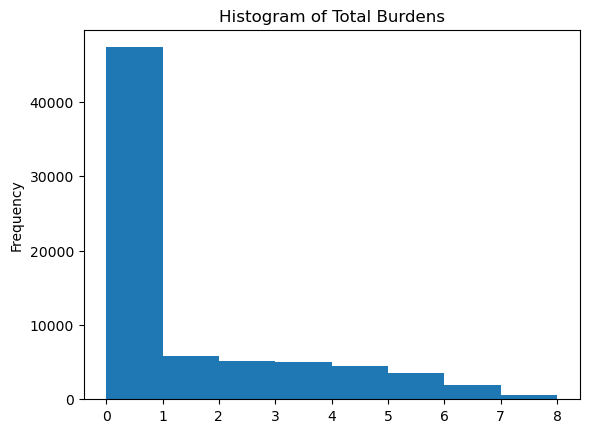

In [7]:
national_results['total_burdens'].plot(kind='hist', bins=8)
plt.title('Histogram of Total Burdens')

Text(0.5, 1.0, 'Histogram of Total Criteria')

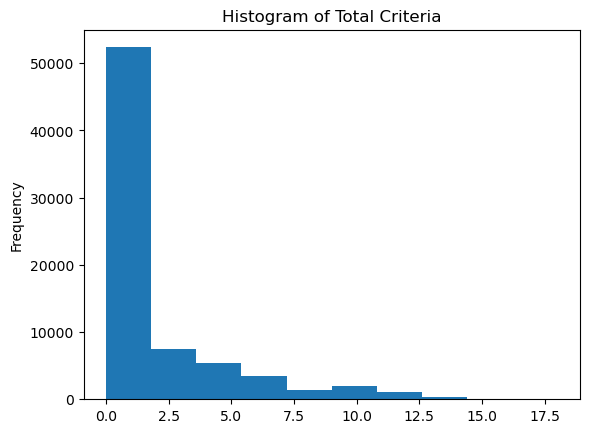

In [5]:
national_results['total_criteria'].plot(kind='hist')
plt.title('Histogram of Total Criteria')

In [4]:
national_results.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
west = -124.848974  # Leftmost longitude (Cape Alava, Washington)
east = -66.947028   # Rightmost longitude (West Quoddy Head, Maine)
south = 24.396308   # Bottommost latitude (Key West, Florida)
north = 49.384358   # Topmost latitude (Northwest Angle, Minnesota)

bbox = [west, south, east, north]  # [min_lon, min_lat, max_lon, max_lat]
# or as
bbox = [[south, west], [north, east]]  # [[min_lat, min_lon], [max_lat, max_lon]]

map = folium.Map()
map.fit_bounds(bbox)
map

In [17]:
folium.Choropleth(
    geo_data=national_results,
    name="choropleth",
    data=national_results,
    columns=["geometry", "standardized_g_star"],
    key_on="feature.id",  # Changed this line
    fill_color="RdBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Standardized G Star",
).add_to(map)


In [ ]:
# folium.LayerControl().add_to(map)
# map

In [ ]:
national_small = national_results[['geometry', 'standardized_g_star']]
national_small = national_small.rename(columns={'standardized_g_star':'stand_gstar'})
national_small.head()

,geometry,stand_gstar
0,"POLYGON ((-86.48196 32.49876, -86.48189 32.498...",-0.620617
1,"POLYGON ((-86.46828 32.4737, -86.468 32.47371,...",-0.620617
2,"POLYGON ((-86.46538 32.47372, -86.46597 32.473...",-0.620617
3,"POLYGON ((-86.43807 32.45349, -86.43812 32.453...",-0.620617
4,"POLYGON ((-86.4118 32.47416, -86.4118 32.47369...",-0.620617


In [7]:
len(national_small)

73767

In [ ]:
# national_small.to_file('/capstone/justice40/data/national_small.geojson', driver="GeoJSON")  

In [ ]:
gstar_test = national_results[['tract_id', 'standardized_g_star']]
gstar_test = gstar_test.rename(columns={'standardized_g_star':'stand_gstar'})
gstar_test.head()

     tract_id  stand_gstar
0  1001020100    -0.620617
1  1001020200    -0.620617
2  1001020300    -0.620617
3  1001020400    -0.620617
4  1001020500    -0.620617


pandas.core.frame.DataFrame

In [ ]:
# gstar_test.to_csv('/capstone/justice40/data/gstar_test.csv', index=False)
